In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable
plt.rcParams['figure.figsize'] = [8, 8]

Результат:
x: 7.7272727
y: 4.5454545


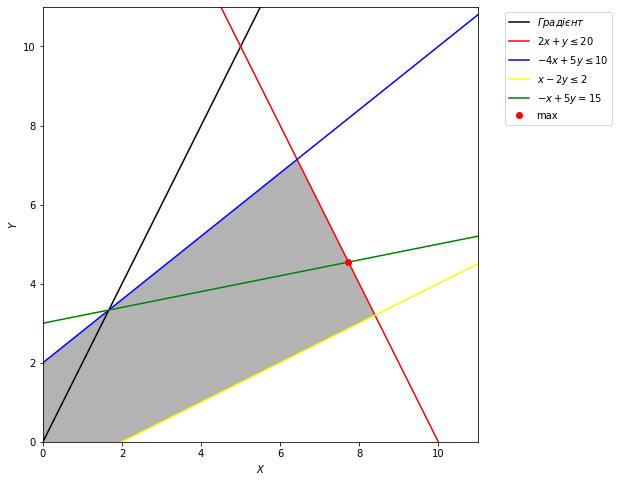

In [15]:
# Симплекс метод, графічно

# Створюємо модель
model = LpProblem(name="small-problem", sense=LpMaximize)

# Ініціалізуємо змінні рішення: x, y - змінюється неперервно || якщо ціле число використовуємо {cat="Integer"}, 
x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

# Додаємо обмеження
model += ( 2 * x + y <= 20, "red_constraint")
model += (-4 * x + 5 * y <= 10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

# Додаємо цільову функцію
model += lpSum([x, 2 * y])

# Вирішуємо задачу оптимізіції
status = model.solve()

# Зберігаємо точку максимізації для нанесення на графік 

print ("Результат:")
varsp = []
for variable in model.variables():
    print(f"{variable.name}: {variable.value()}")
    varsp.append(variable.varValue)

# Позначаємо можливу область
d = np.linspace(0, 20, 3000)
x,y = np.meshgrid(d,d)
plt.imshow(((y <= 20 - 2 * x) & (y <= (10 + 4 * x) / 5.0) & (y >= - (2 - x) / 2)).astype(int),
           extent=(x.min(),x.max(),y.min(),y.max()),
           origin="lower", cmap="Greys", alpha = 0.3);

# Будуємо лінії що визначають обмеження
x = np.linspace(0, 20, 12)

y = x * 2

# red
# 2x + y <= 20
y1 = 20 - 2 * x

# blue
# -4x + 5y <= 10
y2 = (10 + 4 * x) / 5.0

# yellow
# x - 2y <= 2
y3 = - (2 - x) / 2

# green
# -x + 5y = 15
y4 = (x + 15) / 5

# Будуємо графік
plt.plot(x, y, 'black', label=r'$Градієнт$')
plt.plot(x, y1, 'red', label=r'$2x+y\leq20$', )
plt.plot(x, y2, 'blue', label=r'$-4x+5y\leq10$')
plt.plot(x, y3, 'yellow', label=r'$x-2y\leq2$')
plt.plot(x, y4, 'green', label=r'$-x+5y=15$')
plt.plot(varsp[0], varsp[1], 'ro', label='max', markersize=6)

plt.xlim(0,11)
plt.ylim(0,11)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [3]:
################################################################################################################################

Результат:
x: 7.0
y: 4.4


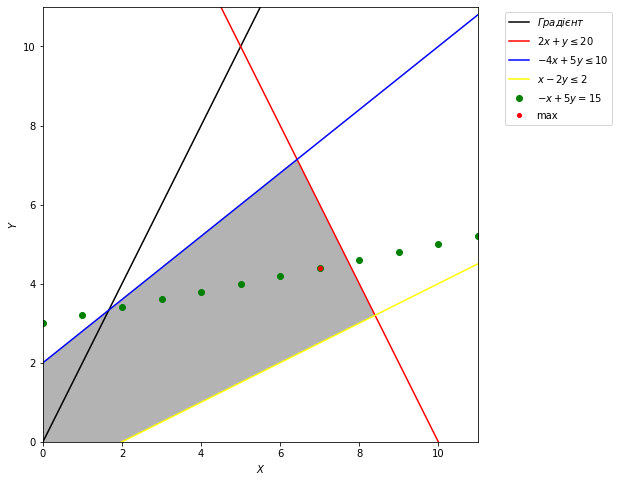

In [4]:
# Якщо задача вимагає оперувати цілими числами,
# в LpVariable використовуємо параметр (cat="Integer").

model = LpProblem(name="small-problem", sense=LpMaximize)

# Ініціалізуємо змінні рішення: x - ціле число; y - змінюється неперервно
x = LpVariable(name="x", lowBound=0, cat="Integer")
y = LpVariable(name="y", lowBound=0)

model += ( 2 * x + y <= 20, "red_constraint")
model += (-4 * x + 5 * y <= 10, "blue_constraint")
model += (-x + 2 * y >= -2, "yellow_constraint")
model += (-x + 5 * y == 15, "green_constraint")

model += lpSum([x, 2 * y])

status = model.solve()

print ("Результат:")
varsp = []
for variable in model.variables():
    print(f"{variable.name}: {variable.value()}")
    varsp.append(variable.varValue)

# Графічно
d = np.linspace(0, 11, 3000)
x,y = np.meshgrid(d,d)
plt.imshow(((y <= 20 - 2 * x) & (y <= (10 + 4 * x) / 5.0) & (y >= - (2 - x) / 2)).astype(int),
           extent=(x.min(),x.max(),y.min(),y.max()),
           origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(0, 11, 12)

y = x * 2
y1 = 20 - 2 * x
y2 = (10 + 4 * x) / 5.0
y3 = - (2 - x) / 2
y4 = (x + 15) / 5

plt.plot(x, y, 'black', label=r'$Градієнт$')
plt.plot(x, y1, 'red', label=r'$2x+y\leq20$', )
plt.plot(x, y2, 'blue', label=r'$-4x+5y\leq10$')
plt.plot(x, y3, 'yellow', label=r'$x-2y\leq2$')
plt.plot(x, y4, 'go', label=r'$-x+5y=15$')
plt.plot(varsp[0], varsp[1], 'ro', label='max', markersize=4)

plt.xlim(0,11)
plt.ylim(0,11)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [5]:
################################################################################################################################

In [6]:
model = LpProblem(name="small-problem", sense=LpMaximize)

x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

model += ( x + 2 * y <= 25, "red_constraint")
model += (-3 * x + 3 * y <= 16, "blue_constraint")
model += (-7 * x + 2 * y <= -2, "yellow_constraint")
model += (-2 * x + 6 * y >= 7, "green_constraint")

model += lpSum([2 * x, 3 * y])

status = model.solve()

print ("Результат:")
varsp = []
for variable in model.variables():
    print(f"{variable.name}: {variable.value()}")
    varsp.append(variable.varValue)

Результат:
x: 13.6
y: 5.7


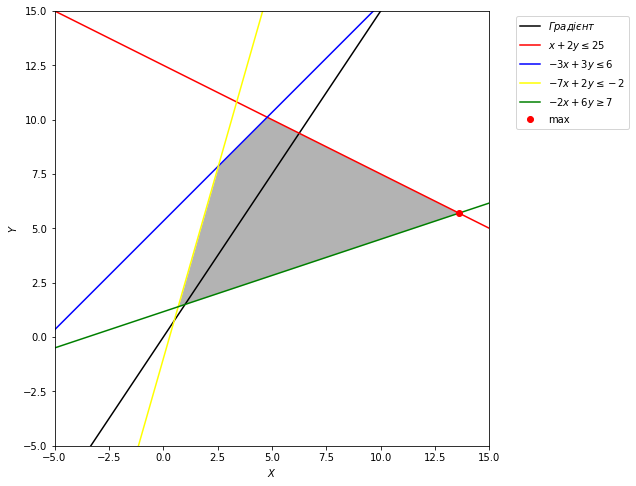

In [7]:
d = np.linspace(-10, 20, 3000)
x,y = np.meshgrid(d,d)
plt.imshow(((y <= (25 - x) / 2) & (y <= (3 * x + 16) / 3) & (y <= (7 * x - 2) / 2) & (y >= (2 * x + 7) / 6)).astype(int),
           extent=(x.min(),x.max(),y.min(),y.max()),
           origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(-10, 20, 3000)

y1 = (25 - x) / 2
y2 = (3 * x + 16) / 3
y3 = (7 * x - 2) / 2
y4 = (2 * x + 7) / 6

plt.plot(2 * x, 3 * x, 'black', label=r'$Градієнт$')
plt.plot(x, y1, 'red', label=r'$x+2y\leq25$', )
plt.plot(x, y2, 'blue', label=r'$-3x+3y\leq6$')
plt.plot(x, y3, 'yellow', label=r'$-7x+2y\leq-2$')
plt.plot(x, y4, 'g', label=r'$-2x+6y\geq7$')
plt.plot(varsp[0], varsp[1], 'ro', label='max')

plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [8]:
################################################################################################################################

In [9]:
model = LpProblem(name="small-problem", sense=LpMaximize)

x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

model += ( 6 * x + 4 * y <= 24, "red_constraint")
model += ( 6 * x + 3 * y <= 22.5, "blue_constraint")
model += ( x + y <= 5, "yellow_constraint")
model += ( x + 2 * y <= 6, "green_constraint")
model += (-x + y <= 1, "m_constraint")

model += lpSum([5 * x, 4 * y])

status = model.solve()

print ("Результат:")
varsp = []
for variable in model.variables():
    print(f"{variable.name}: {variable.value()}")
    varsp.append(variable.varValue)

Результат:
x: 3.0
y: 1.5


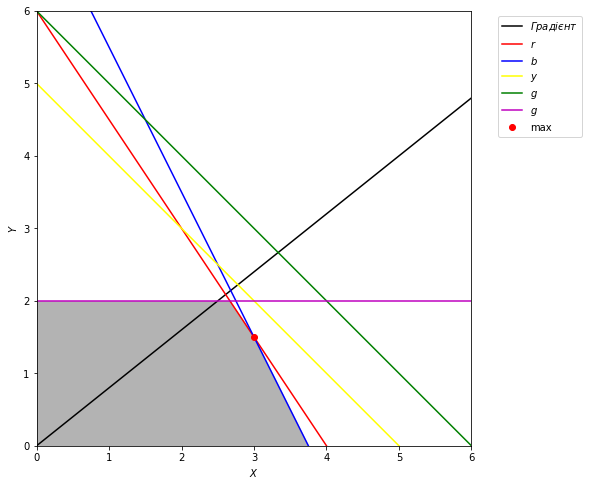

In [10]:
d = np.linspace(0, 20, 3000)
x,y = np.meshgrid(d,d)
plt.imshow(((y <= 2) & (y <= (-6 * x + 24) / 4) & (y <= (-6 * x + 22.5) / 3) & (y <= -x + 5) & (y <= -x + 6)).astype(int),
           extent=(x.min(),x.max(),y.min(),y.max()),
           origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(0, 20, 3000)
y = np.linspace(2, 2, 3000)

y1 = (-6 * x + 24) / 4
y2 = (-6 * x + 22.5) / 3
y3 = (-x + 5)
y4 = (-x + 6)

plt.plot(5 * x, 4 * x, 'black', label=r'$Градієнт$')
plt.plot(x, y1, 'red', label=r'$r$', )
plt.plot(x, y2, 'blue', label=r'$b$')
plt.plot(x, y3, 'yellow', label=r'$y$')
plt.plot(x, y4, 'green', label=r'$g$')
plt.plot(x, y, 'm', label=r'$g$')
plt.plot(varsp[0], varsp[1], 'ro', label='max')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [11]:
################################################################################################################################

In [12]:
model = LpProblem(name="small-problem", sense=LpMaximize)

x = LpVariable(name="x", lowBound=0)
y = LpVariable(name="y", lowBound=0)

model += ( 6 * x + 4 * y <= 24, "red_constraint")
model += ( x + 2 * y <= 6, "blue_constraint")
model += (-x + y <= 1, "yellow_constraint")
model += ( y <= 2, "green_constraint")

model += lpSum([5 * x, 4 * y])

status = model.solve()

print ("Результат:")
varsp = []
for variable in model.variables():
    print(f"{variable.name}: {variable.value()}")
    varsp.append(variable.varValue)

Результат:
x: 3.0
y: 1.5


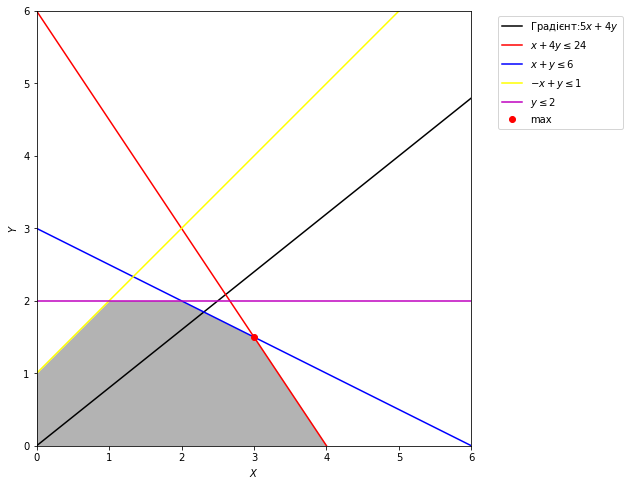

In [13]:
d = np.linspace(0, 20, 3000)
x,y = np.meshgrid(d,d)
plt.imshow(((y <= 2) & (y <= (24 - 6 * x) / 4) & (y <= (6 - x) / 2) & (y <= 1 + x)).astype(int),
           extent=(x.min(),x.max(),y.min(),y.max()),
           origin="lower", cmap="Greys", alpha = 0.3);

x = np.linspace(0, 20, 3000)
y = np.linspace(2, 2, 3000)

y1 = (24 - 6 * x) / 4
y2 = (6 - x) / 2
y3 = 1 + x

plt.plot(5 * x, 4 * x, 'black', label=r'Градієнт:$5x+4y$')
plt.plot(x, y1, 'red', label=r'$x+4y\leq24$', )
plt.plot(x, y2, 'blue', label=r'$x+y\leq6$')
plt.plot(x, y3, 'yellow', label=r'$-x+y\leq1$')
plt.plot(x, y, 'm', label=r'$y\leq2$')
plt.plot(varsp[0], varsp[1], 'ro', label='max')

plt.xlim(0, 6)
plt.ylim(0, 6)
plt.xlabel(r'$X$')
plt.ylabel(r'$Y$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [14]:
################################################################################################################################